# Script Assignment 6 - Group 1
#### Marco Bogani, Daman Sawhney, Sulaiman Karmali, Ivan Lima, Zach Novak

In Financial Technology (FinTech), anomaly detection plays a crucial role in identifying fraudulent activities such as money laundering or unauthorized transactions. One popular method for anomaly detection is DBSCAN (Density-Based Spatial Clustering of Applications with Noise), which effectively identifies clusters of data points that are closely packed together while marking outliers as noise. In this assignment, you are tasked with implementing a Python script to detect anomalous transactions in financial data using DBSCAN.

Instructions:
1. Download the provided financial transaction datasetLinks to an external site.. Links to an external site.Preprocess the data if necessary (e.g., normalization, feature engineering). (5 points)

2. Implement the DBSCAN algorithm using the scikit-learn library. Tune the hyperparameters such as epsilon (eps) and minimum samples (min_samples) to achieve optimal performance. Cluster the transactions using DBSCAN.  (10 points)

3. Identify anomalous transactions as outliers detected by DBSCAN. Analyze the characteristics of these anomalies to understand their nature. Visualize the clusters and outliers for better insights.  (5 points)

Import Libraries

Leading the data for basic analysis

In [41]:
import pandas as pd

# Load the dataset, '2' is for small subset of dataset meant for rapid testing
#data = pd.read_excel('bank.xlsx')
data = pd.read_excel('bank2.xlsx') 

In [42]:
# Test data read
data.head()

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.00,1000000.00,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.00,2000000.00,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.00,2500000.00,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.00,5500000.00,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.00,6000000.00,.


In [43]:
# Test data read - column
column_names = pd.DataFrame(data.columns)
column_names

,0
0,Account No
1,DATE
2,TRANSACTION DETAILS
3,CHQ.NO.
4,VALUE DATE
5,WITHDRAWAL AMT
6,DEPOSIT AMT
7,BALANCE AMT
8,.


In [5]:
# Get the information about the data
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Account No           2999 non-null   object        
 1   DATE                 2999 non-null   datetime64[ns]
 2   TRANSACTION DETAILS  2999 non-null   object        
 3   CHQ.NO.              9 non-null      float64       
 4   VALUE DATE           2999 non-null   datetime64[ns]
 5   WITHDRAWAL AMT       1413 non-null   float64       
 6   DEPOSIT AMT          1586 non-null   float64       
 7   BALANCE AMT          2999 non-null   float64       
 8   .                    2999 non-null   object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 211.0+ KB


In [44]:
# Analyze '.' column
periodcount = data['.'].value_counts()
periodcount

.
.    2999
Name: count, dtype: int64

In [45]:
# Drop '.' column
data.drop(['.'], axis=1, inplace=True)

In [46]:
# Count n/a's
nacount = data.isna().sum()
nacount

Account No                0
DATE                      0
TRANSACTION DETAILS       0
CHQ.NO.                2990
VALUE DATE                0
WITHDRAWAL AMT         1586
DEPOSIT AMT            1413
BALANCE AMT               0
dtype: int64

In [47]:
# Further analyze data
pd.options.display.float_format = '{:.2f}'.format
descdf = data.describe()
descdf = descdf.drop(['DATE', 'VALUE DATE'], axis=1)
descdf

,CHQ.NO.,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT
count,9.00,1413.00,1586.00,2999.00
mean,5.00,870915.43,458755.37,-9967476.99
min,1.00,1.25,0.90,-558752028.14
25%,3.00,22018.40,5000.00,800840.61
50%,5.00,117674.17,27978.28,1073543.55
75%,7.00,242750.00,300000.00,1374909.42
max,9.00,354000000.00,202100000.00,8500000.00
std,2.74,11443532.47,6685838.86,72094844.09


In [48]:
# Count unique account numbers
len(data['Account No'].unique())

5

In [49]:
# NA attempt 1 - Replace missing values with the mean of the column
data['WITHDRAWAL AMT'] = data['WITHDRAWAL AMT'].fillna(data['WITHDRAWAL AMT'].mean())
data['DEPOSIT AMT'] = data['DEPOSIT AMT'].fillna(data['DEPOSIT AMT'].mean())
data['BALANCE AMT'] = data['BALANCE AMT'].fillna(data['BALANCE AMT'].mean())
data['CHQ.NO.'] = data['CHQ.NO.'].fillna(0)
data.head()

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,0.00,2017-06-29,870915.43,1000000.00,1000000.00
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,0.00,2017-07-05,870915.43,1000000.00,2000000.00
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,0.00,2017-07-18,870915.43,500000.00,2500000.00
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,0.00,2017-08-01,870915.43,3000000.00,5500000.00
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,0.00,2017-08-16,870915.43,500000.00,6000000.00


In [ ]:
# Reserved for adding new features if needed

Re-Loading the data for processing

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel('bank2.xlsx')
# data cleaning 'Account No'
data['Account No'] = data['Account No'].str.strip("'")

# Preprocessing
# Dropping irrelevant columns for clustering
data_clustering = data.drop(columns=['TRANSACTION DETAILS', 'CHQ.NO.', '.'])

# Handling missing values by filling NaN with 0's
data_clustering['WITHDRAWAL AMT'] = data_clustering['WITHDRAWAL AMT'].fillna(0)
data_clustering['DEPOSIT AMT'] = data_clustering['DEPOSIT AMT'].fillna(0)

# Feature engineering: Adding day of the week and day of the year as features
data_clustering['DAY OF WEEK'] = data_clustering['DATE'].dt.dayofweek
data_clustering['DAY OF YEAR'] = data_clustering['DATE'].dt.dayofyear

# Dropping the original date columns as they've been replaced by engineered features
data_clustering = data_clustering.drop(columns=['DATE', 'VALUE DATE'])

# Normalizing the numerical features
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_clustering)


Distances: [1.38729306e-08 1.38729306e-08 1.73411632e-08 ... 6.70342870e+00
 6.70342870e+00 2.37238019e+01]


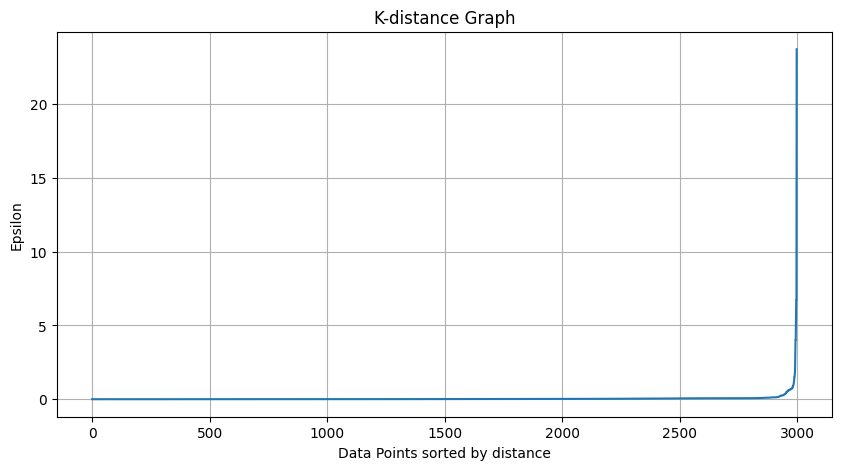

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Hyperparameter Tuning for DBSCAN

# First, we estimate an appropriate 'eps' value using the NearestNeighbors to calculate the k-distance graph
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(data_normalized)
distances, indices = neighbors_fit.kneighbors(data_normalized)

# Sorting the distances to find the optimal 'eps'
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
print("Distances:", distances)
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.grid(True)
plt.show()


Clustering with DBSCAN

In [52]:
# Based on the k-distance graph, we choose an 'eps' value where the graph starts to plateau
# Testing eps=0.5 and min_samples=10 based on visual inspection and the dataset's characteristics.

# Using DBSCAN with the estimated 'eps' and 'min_samples' values
eps_value = 0.5  # Estimated visually from the k-distance graph
min_samples_value = 10  # Starting with twice the number of features

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(data_normalized)

# Adding the cluster labels to our dataset
data_clustering['Cluster'] = clusters

# Displaying the count of points in each cluster
cluster_counts = data_clustering['Cluster'].value_counts().sort_index()

print("*Outliers count represented by -1*")
print(cluster_counts)


*Outliers count represented by -1*
Cluster
-1      99
 0     149
 1     231
 2     171
 3     301
 4     167
 5      74
 6     238
 7     169
 8     168
 9     176
 10    226
 11     66
 12    125
 13    137
 14    110
 15    167
 16    108
 17     83
 18     34
Name: count, dtype: int64


Identifying outliers 

In [59]:
# Identifying outliers (-1 labels from DBSCAN indicate outliers)
outliers = data_clustering[data_clustering['Cluster'] == -1]

normal_data = data_clustering[data_clustering['Cluster'] != -1]
normal_withdrawal_stats = normal_data['WITHDRAWAL AMT'].describe()
normal_deposit_stats = normal_data['DEPOSIT AMT'].describe()

# Analyzing the characteristics of anomalous transactions
# You might want to look at statistical summaries, specific transaction details, or patterns that distinguish these anomalies.
outlier_stats = outliers.describe()

# For a more detailed examination, you could look at specific columns or aggregate statistics. Here's an example:
outlier_withdrawals = outliers['WITHDRAWAL AMT'].describe()
outlier_deposits = outliers['DEPOSIT AMT'].describe()

print("Anomalous Transactions Statistics:")
print(outlier_stats)

print("\n**Anomalous Withdrawals** Statistics:")
print(outlier_withdrawals)

print("\n**Anomalous Deposits** Statistics:")
print(outlier_deposits)

print("Anomalous vs Normal **Withdrawal** Amounts:")
print(pd.DataFrame({'Anomalous': outlier_withdrawals, 'Normal': normal_withdrawal_stats}))

print("\nAnomalous vs Normal **Deposit** Amounts:")
print(pd.DataFrame({'Anomalous': outlier_deposits, 'Normal': normal_deposit_stats}))

Anomalous Transactions Statistics:
       WITHDRAWAL AMT  DEPOSIT AMT   BALANCE AMT  DAY OF WEEK  DAY OF YEAR  \
count           99.00        99.00         99.00        99.00        99.00   
mean       9952483.93   4866550.76 -337240919.95         2.51       155.04   
std       42385068.96  26482702.10  217010055.61         1.84       122.91   
min              0.00         0.00 -558752028.14         0.00         3.00   
25%              0.00         0.00 -547376123.65         1.00        54.00   
50%              0.00      3000.00 -356966125.65         3.00       107.00   
75%        1790988.50     80988.46   -7042306.40         4.00       271.50   
max      354000000.00 202100000.00    1464577.60         6.00       365.00   

       Cluster  
count    99.00  
mean     -1.00  
std       0.00  
min      -1.00  
25%      -1.00  
50%      -1.00  
75%      -1.00  
max      -1.00  

**Anomalous Withdrawals** Statistics:
count          99.00
mean      9952483.93
std      42385068.96
min    

Summarizing anomalies

In [57]:
# Defining a threshold for "extremely high" withdrawal amounts, testing with the 95th percentile of normal withdrawals
high_withdrawal_threshold = normal_data['WITHDRAWAL AMT'].quantile(0.95)

# Filter transactions that exceed this threshold
high_withdrawal_transactions = data_clustering[data_clustering['WITHDRAWAL AMT'] > high_withdrawal_threshold]
print("Transactions with Extremely High Withdrawal Amounts:")
print(high_withdrawal_transactions)

# Extract the list of unique account numbers associated with these transactions
flagged_account_numbers = high_withdrawal_transactions['Account No'].unique()
print("\nList of Flagged Account Numbers for Extremely High Withdrawal Amounts:")
print(flagged_account_numbers)

Transactions with Extremely High Withdrawal Amounts:
        Account No  WITHDRAWAL AMT  DEPOSIT AMT   BALANCE AMT  DAY OF WEEK  \
193   409000611074       654498.00         0.00    1041307.00            1   
194   409000611074       504450.00         0.00     536857.00            2   
196   409000611074       561225.00         0.00     475632.00            3   
224   409000611074       495252.00         0.00     571196.00            2   
235   409000611074       518375.00         0.00     525570.00            2   
...            ...             ...          ...           ...          ...   
2987  409000405747      1696058.00         0.00 -548416974.65            3   
2988  409000405747      1546542.00         0.00 -549963516.65            3   
2991  409000438611    130000000.00         0.00 -508017458.65            4   
2992  409000438611     40000000.00         0.00 -548017458.65            4   
2998  409000438611     15000000.00         0.00 -503017487.28            4   

      DAY 

Visualize the Clusters and Outliers for better insights

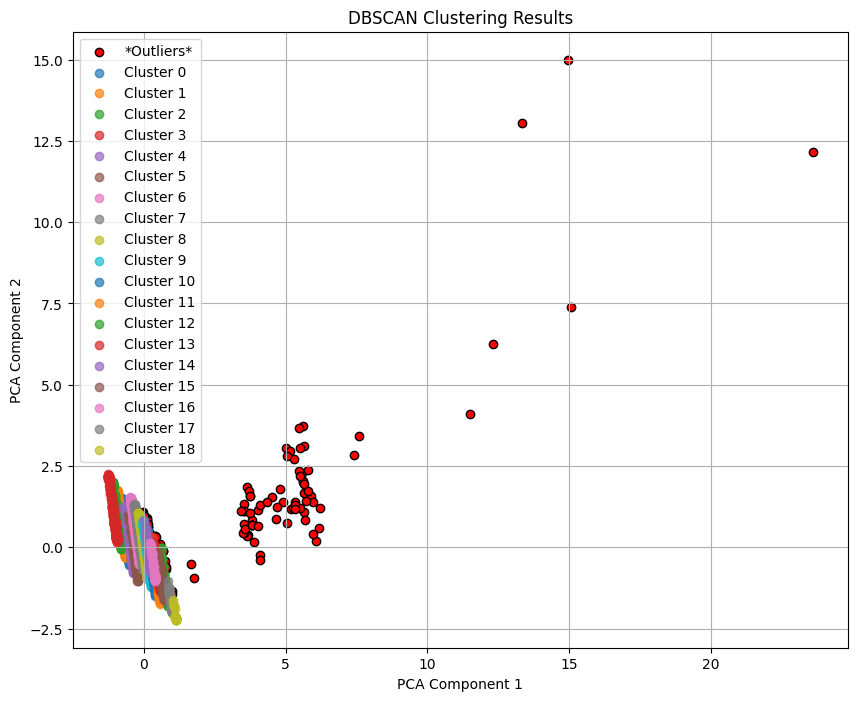

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducing the data to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Plotting the results
plt.figure(figsize=(10, 8))

# Plotting clusters and outliers with different colors
unique_clusters = sorted(data_clustering['Cluster'].unique())
for cluster in unique_clusters:
    mask = data_clustering['Cluster'] == cluster
    if cluster == -1:  # Outliers
        plt.scatter(data_pca[mask, 0], data_pca[mask, 1], label='*Outliers*', edgecolor='black', c='red')
    else:
        plt.scatter(data_pca[mask, 0], data_pca[mask, 1], label=f'Cluster {cluster}', alpha=0.7)

plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()
